In [ ]:
suppressMessages({
library(ggplot2)
library(reshape2)
library(argparser)
library(Seurat)
library(corrplot)
library(dplyr)
library(grid)
library(cowplot)
library(dplyr)
library(grid)
library(tidyverse)
})

In [ ]:
rds = readRDS("/SGRNJ06/randd/PROJECT/RD20102301_DZH/P21090901_Drug_CART/20230714_zl/singleR_annotation/ZD025_S2_M3_ZL/ZD025_S2_M3_ZL.rds")

In [ ]:
clustcol<-c("OrangeRed","SlateBlue3","DarkOrange","GreenYellow","Purple","DarkSlateGray","Gold","DeepPink2","Red4","#4682B4","#FFDAB9","#708090","#836FFF","#CDC673","#CD9B1D","#FF6EB4","#CDB5CD","DarkGreen","#008B8B","#43CD80","#483D8B","#66CD00","#CDC673","#CDAD00","#CD9B9B","#FF8247","#8B7355","#8B3A62","#68228B","#CDB7B5","#CD853F","#6B8E23","#696969","#7B68EE","#9F79EE","#B0C4DE","#7A378B","#66CDAA","#EEE8AA","#00FF00","#EEA2AD","#A0522D","#000080","#E9967A","#00CDCD","#8B4500","#DDA0DD","#EE9572","#EEE9E9","#8B1A1A","#8B8378","#EE9A49","#EECFA1","#8B4726","#8B8878","#EEB4B4","#C1CDCD","#8B7500","#0000FF","#EEEED1","#4F94CD","#6E8B3D","#B0E2FF","#76EE00","#A2B5CD","#548B54","#BBFFFF","#B4EEB4","#00C5CD","#008B8B","#7FFFD4","#8EE5EE","#43CD80","#68838B","#00FF00","#B9D3EE","#9ACD32","#00688B","#FFEC8B","#1C86EE","#CDCD00","#473C8B","#FFB90F","#EED5D2","#CD5555","#CDC9A5","#FFE7BA","#FFDAB9","#CD661D","#CDC5BF","#FF8C69","#8A2BE2","#CD8500","#B03060","#FF6347","#FF7F50","#CD0000","#F4A460","#FFB5C5","#DAA520","#CD6889","#32CD32","#FF00FF","#2E8B57","#CD96CD","#48D1CC","#9B30FF","#1E90FF","#CDB5CD","#191970","#E8E8E8","#FFDAB9")

In [15]:
head(rds)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,RNA_snn_res.0.6,seurat_clusters,celltype
,<fct>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<chr>
AAACATCGAAGACGGACTAAGGTC,ZD025_S2_M3_ZL,1236,690,0.09870550,3,4,T_cells
AAACATCGACAGCAGAGAACAGGC,ZD025_S2_M3_ZL,9664,2244,0.04045944,0,1,Macrophage
AAACATCGACATTGGCAACGCTTA,ZD025_S2_M3_ZL,1110,651,0.05675676,1,2,T_cells
AAACATCGACATTGGCCTGAGCCA,ZD025_S2_M3_ZL,771,394,0.06225681,2,3,T_cells
AAACATCGACATTGGCGTCTGTCA,ZD025_S2_M3_ZL,2512,1118,0.10828025,8,9,Endothelial_cells
AAACATCGACGCTCGACGACACAC,ZD025_S2_M3_ZL,728,467,0.06181319,1,2,T_cells
AAACATCGAGAGTCAACCGAAGTA,ZD025_S2_M3_ZL,9282,2225,0.07983193,0,1,Macrophage
AAACATCGAGGCTAACCTAAGGTC,ZD025_S2_M3_ZL,1389,779,0.06407487,1,2,T_cells
AAACATCGATCCTGTAATGCCTAA,ZD025_S2_M3_ZL,832,532,0.11057692,1,2,T_cells


In [ ]:
head(rds)

freq_table <- prop.table(x=table(rds@active.ident,rds@meta.data[,"celltype"]),margin=2)
mix=1.5

In [ ]:
rds@active.ident

In [ ]:
freq_table

In [ ]:
barplot(height=freq_table,width = mix,xlim=c(1,60),legend = rownames(freq_table),args.legend = list(x = "right"),las=2,xlab="",col =clustcol)

In [ ]:
pdf(file = '/SGRNJ06/randd/PROJECT/RD20102301_DZH/P21090901_Drug_CART/20230714_zl/singleR_annotation/ZD025_S2_M3_ZL/PercentPerCell.pdf')
barplot(height=freq_table,width = mix,xlim=c(1,60),legend = rownames(freq_table),args.legend = list(x = "right"),las=2,xlab="",col =clustcol)
dev.off()

In [17]:
colour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",  
         "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
         "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
         "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")

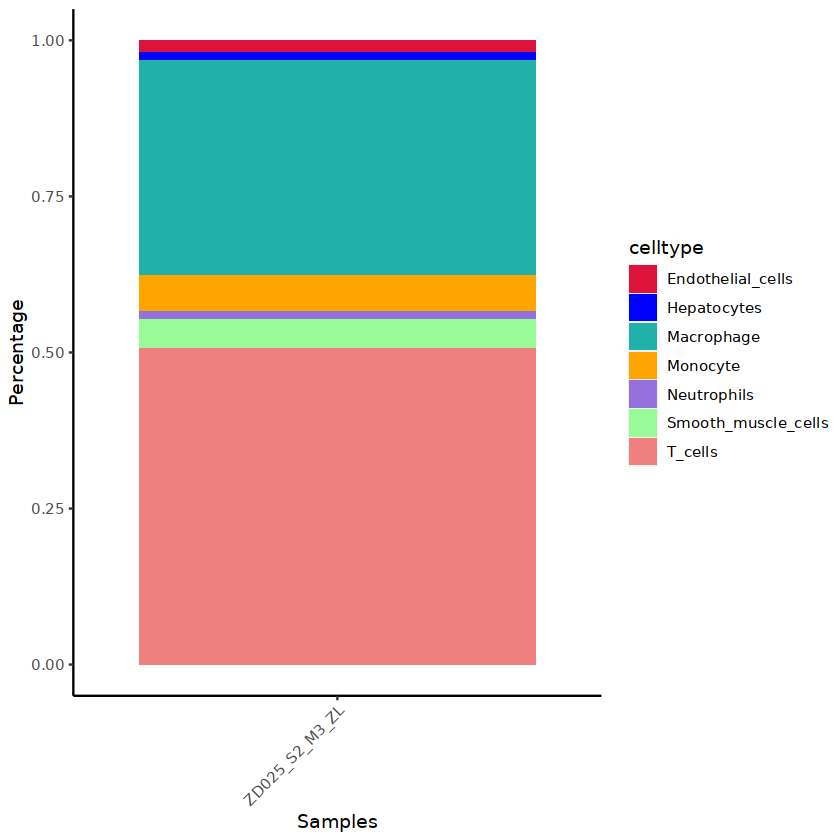

In [18]:
sample_table <- as.data.frame(table(rds@meta.data$orig.ident,rds@meta.data$celltype))
names(sample_table) <- c("Samples","celltype","CellNumber")

plot_sample<-ggplot(sample_table,aes(x=Samples,weight=CellNumber,fill=celltype))+
  geom_bar(position="fill")+
  scale_fill_manual(values=colour) + 
  theme(panel.grid = element_blank(),
        panel.background = element_rect(fill = "transparent",colour = NA),
        axis.line.x = element_line(colour = "black") ,
        axis.line.y = element_line(colour = "black") ,
        plot.title = element_text(lineheight=.8, face="bold", hjust=0.5, size =16)
  )+labs(y="Percentage")+RotatedAxis()
plot_sample

In [19]:
pdf(file = '/SGRNJ06/randd/PROJECT/RD20102301_DZH/P21090901_Drug_CART/20230714_zl/singleR_annotation/ZD025_S2_M3_ZL/PercentPerCell.pdf')
plot_sample
dev.off()

png 
  2

In [23]:
color1 <- c("OrangeRed","SlateBlue3","DarkOrange","GreenYellow","Purple","DarkSlateGray","Gold",
  "DeepPink2","Red4","#4682B4","#FFDAB9","#708090","#836FFF","#CDC673","#CD9B1D","#FF6EB4",
  "#CDB5CD","DarkGreen","#008B8B","#43CD80","#483D8B","#66CD00","#CDC673","#CDAD00","#CD9B9B",
  "#FF8247","#8B7355","#8B3A62","#68228B","#CDB7B5","#CD853F","#6B8E23","#696969","#7B68EE",
  "#9F79EE","#B0C4DE","#7A378B","#66CDAA","#EEE8AA","#00FF00","#EEA2AD","#A0522D","#000080",
  "#E9967A","#00CDCD","#8B4500","#DDA0DD","#EE9572","#EEE9E9","#8B1A1A","#8B8378","#EE9A49",
  "#EECFA1","#8B4726","#8B8878","#EEB4B4","#C1CDCD","#8B7500","#0000FF","#EEEED1","#4F94CD",
  "#6E8B3D","#B0E2FF","#76EE00","#A2B5CD","#548B54","#BBFFFF","#B4EEB4","#00C5CD","#008B8B",
  "#7FFFD4","#8EE5EE","#43CD80","#68838B","#00FF00","#B9D3EE","#9ACD32","#00688B","#FFEC8B",
  "#1C86EE","#CDCD00","#473C8B","#FFB90F","#EED5D2","#CD5555","#CDC9A5","#FFE7BA","#FFDAB9",
  "#CD661D","#CDC5BF","#FF8C69","#8A2BE2","#CD8500","#B03060","#FF6347","#FF7F50","#CD0000",
  "#F4A460","#FFB5C5","#DAA520","#CD6889","#32CD32","#FF00FF","#2E8B57","#CD96CD","#48D1CC",
  "#9B30FF","#1E90FF","#CDB5CD","#191970","#E8E8E8","#FFDAB9")

In [29]:
pdf(file = '/SGRNJ06/randd/PROJECT/RD20102301_DZH/P21090901_Drug_CART/20230714_zl/singleR_annotation/ZD025_S2_M3_ZL/celltype_tsne.pdf',height=10, width=12)
DimPlot(rds,reduction="tsne", group.by="celltype", cols=color1, pt.size=1.4, label=TRUE, label.size = 4)
dev.off()

png 
  2

In [30]:
pdf(file = '/SGRNJ06/randd/PROJECT/RD20102301_DZH/P21090901_Drug_CART/20230714_zl/singleR_annotation/ZD025_S2_M3_ZL/celltype_umap.pdf',height=10, width=12)
DimPlot(rds,reduction="umap", group.by="celltype", cols=color1, pt.size=1.4, label=TRUE, label.size = 4)
dev.off()

png 
  2